In [42]:
import csv
import re
import pandas as pd
import math
from statistics import mean
from statistics import mode
from statistics import stdev
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import requests
import time

In [10]:
df = pd.read_csv('test.csv',index_col = 0)
df = pd.DataFrame(df)

In [11]:
df.shape

(20752, 17)

In [12]:
df2 = df.iloc[0:10000]

In [13]:
df2

,MANE,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature,BIOTYPE,cDNA_position,CDS_position,Protein_position,ENSP,CLIN_SIG,CANONICAL,ProteinSeq,Canonical Transcript
#Uploaded_variation,,,,,,,,,,,,,,,,,
NC_000001.11:g.1014143C>T,NM_005101.4,1:1014143-1014143,T,stop_gained,HIGH,ISG15,ENSG00000187608,ENST00000649529.1,protein_coding,240,163,55,ENSP00000496832,pathogenic,YES,MGWDLTVKMLAGNEFQVSLSSSMSVSELKAQITQKIGVHAFQQRLA...,ENST00000379389
NC_000001.11:g.1014359G>T,NM_005101.4,1:1014359-1014359,T,stop_gained,HIGH,ISG15,ENSG00000187608,ENST00000649529.1,protein_coding,456,379,127,ENSP00000496832,pathogenic,YES,MGWDLTVKMLAGNEFQVSLSSSMSVSELKAQITQKIGVHAFQQRLA...,ENST00000379389
NC_000001.11:g.1041582C>T,NM_198576.4,1:1041582-1041582,T,stop_gained,HIGH,AGRN,ENSG00000188157,ENST00000379370.7,protein_coding,1110,1057,353,ENSP00000368678,pathogenic,YES,MAGRSHPGPLRPLLPLLVVAACVLPGAGGTCPERALERREEEANVV...,ENST00000379370
NC_000001.11:g.1042053C>G,NM_198576.4,1:1042053-1042053,G,stop_gained,HIGH,AGRN,ENSG00000188157,ENST00000379370.7,protein_coding,1328,1275,425,ENSP00000368678,-,YES,MAGRSHPGPLRPLLPLLVVAACVLPGAGGTCPERALERREEEANVV...,ENST00000379370
NC_000001.11:g.1045487C>T,NM_198576.4,1:1045487-1045487,T,stop_gained,HIGH,AGRN,ENSG00000188157,ENST00000379370.7,protein_coding,2553,2500,834,ENSP00000368678,-,YES,MAGRSHPGPLRPLLPLLVVAACVLPGAGGTCPERALERREEEANVV...,ENST00000379370
NC_000001.11:g.1049672C>T,NM_198576.4,1:1049672-1049672,T,stop_gained,HIGH,AGRN,ENSG00000188157,ENST00000379370.7,protein_coding,4674,4621,1541,ENSP00000368678,likely_pathogenic,YES,MAGRSHPGPLRPLLPLLVVAACVLPGAGGTCPERALERREEEANVV...,ENST00000379370
NC_000001.11:g.1232517G>A,NM_080605.4,1:1232517-1232517,A,stop_gained,HIGH,B3GALT6,ENSG00000176022,ENST00000379198.5,protein_coding,281,239,80,ENSP00000368496,likely_pathogenic,YES,MKLLRRAWRRRAALGLGTLALCGAALLYLARCAAEPGDPRAMSGRS...,ENST00000379198
NC_000001.11:g.1232959C>G,NM_080605.4,1:1232959-1232959,G,stop_gained,HIGH,B3GALT6,ENSG00000176022,ENST00000379198.5,protein_coding,723,681,227,ENSP00000368496,-,YES,MKLLRRAWRRRAALGLGTLALCGAALLYLARCAAEPGDPRAMSGRS...,ENST00000379198
NC_000001.11:g.1233041C>T,NM_080605.4,1:1233041-1233041,T,stop_gained,HIGH,B3GALT6,ENSG00000176022,ENST00000379198.5,protein_coding,805,763,255,ENSP00000368496,-,YES,MKLLRRAWRRRAALGLGTLALCGAALLYLARCAAEPGDPRAMSGRS...,ENST00000379198


In [14]:
df2.dtypes

MANE                    object
Location                object
Allele                  object
Consequence             object
IMPACT                  object
SYMBOL                  object
Gene                    object
Feature                 object
BIOTYPE                 object
cDNA_position            int64
CDS_position             int64
Protein_position         int64
ENSP                    object
CLIN_SIG                object
CANONICAL               object
ProteinSeq              object
Canonical Transcript    object
dtype: object

In [17]:
df2.reset_index()

,#Uploaded_variation,MANE,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature,BIOTYPE,cDNA_position,CDS_position,Protein_position,ENSP,CLIN_SIG,CANONICAL,ProteinSeq,Canonical Transcript
0,NC_000001.11:g.1014143C>T,NM_005101.4,1:1014143-1014143,T,stop_gained,HIGH,ISG15,ENSG00000187608,ENST00000649529.1,protein_coding,240,163,55,ENSP00000496832,pathogenic,YES,MGWDLTVKMLAGNEFQVSLSSSMSVSELKAQITQKIGVHAFQQRLA...,ENST00000379389
1,NC_000001.11:g.1014359G>T,NM_005101.4,1:1014359-1014359,T,stop_gained,HIGH,ISG15,ENSG00000187608,ENST00000649529.1,protein_coding,456,379,127,ENSP00000496832,pathogenic,YES,MGWDLTVKMLAGNEFQVSLSSSMSVSELKAQITQKIGVHAFQQRLA...,ENST00000379389
2,NC_000001.11:g.1041582C>T,NM_198576.4,1:1041582-1041582,T,stop_gained,HIGH,AGRN,ENSG00000188157,ENST00000379370.7,protein_coding,1110,1057,353,ENSP00000368678,pathogenic,YES,MAGRSHPGPLRPLLPLLVVAACVLPGAGGTCPERALERREEEANVV...,ENST00000379370
3,NC_000001.11:g.1042053C>G,NM_198576.4,1:1042053-1042053,G,stop_gained,HIGH,AGRN,ENSG00000188157,ENST00000379370.7,protein_coding,1328,1275,425,ENSP00000368678,-,YES,MAGRSHPGPLRPLLPLLVVAACVLPGAGGTCPERALERREEEANVV...,ENST00000379370
4,NC_000001.11:g.1045487C>T,NM_198576.4,1:1045487-1045487,T,stop_gained,HIGH,AGRN,ENSG00000188157,ENST00000379370.7,protein_coding,2553,2500,834,ENSP00000368678,-,YES,MAGRSHPGPLRPLLPLLVVAACVLPGAGGTCPERALERREEEANVV...,ENST00000379370
5,NC_000001.11:g.1049672C>T,NM_198576.4,1:1049672-1049672,T,stop_gained,HIGH,AGRN,ENSG00000188157,ENST00000379370.7,protein_coding,4674,4621,1541,ENSP00000368678,likely_pathogenic,YES,MAGRSHPGPLRPLLPLLVVAACVLPGAGGTCPERALERREEEANVV...,ENST00000379370
6,NC_000001.11:g.1232517G>A,NM_080605.4,1:1232517-1232517,A,stop_gained,HIGH,B3GALT6,ENSG00000176022,ENST00000379198.5,protein_coding,281,239,80,ENSP00000368496,likely_pathogenic,YES,MKLLRRAWRRRAALGLGTLALCGAALLYLARCAAEPGDPRAMSGRS...,ENST00000379198
7,NC_000001.11:g.1232959C>G,NM_080605.4,1:1232959-1232959,G,stop_gained,HIGH,B3GALT6,ENSG00000176022,ENST00000379198.5,protein_coding,723,681,227,ENSP00000368496,-,YES,MKLLRRAWRRRAALGLGTLALCGAALLYLARCAAEPGDPRAMSGRS...,ENST00000379198
8,NC_000001.11:g.1233041C>T,NM_080605.4,1:1233041-1233041,T,stop_gained,HIGH,B3GALT6,ENSG00000176022,ENST00000379198.5,protein_coding,805,763,255,ENSP00000368496,-,YES,MKLLRRAWRRRAALGLGTLALCGAALLYLARCAAEPGDPRAMSGRS...,ENST00000379198
9,NC_000001.11:g.1327311G>T,NM_001029885.2,1:1327311-1327311,T,stop_gained,HIGH,CPTP,ENSG00000224051,ENST00000343938.9,protein_coding,569,193,65,ENSP00000343890,-,YES,MDDSETGFNLKVVLVSFKQCLDEKEEVLLDPYIASWKGLVRFLNSL...,ENST00000343938


In [16]:
for col in df2.columns:
    print(col)

MANE
Location
Allele
Consequence
IMPACT
SYMBOL
Gene
Feature
BIOTYPE
cDNA_position
CDS_position
Protein_position
ENSP
CLIN_SIG
CANONICAL
ProteinSeq
Canonical Transcript


In [94]:
df['Protein Variant'] = df['Protein Variant'].apply(str)

/Users/dylantom/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [111]:
df = df[df['Protein Variant'].str.startswith('NP')]

In [112]:
df.shape

(4117, 7)

In [142]:
for index, row in df.iterrows():
    Protein_Mutation_Position = int(re.findall(r'\d+', row[3])[-1])
    sub_string = row['ProteinSeq'][Protein_Mutation_Position - 1:-1]
    distance = 0
    retained = 0
    for z, item in enumerate(sub_string):
        if item == 'M':
            distance = z
            ran = sub_string[z:-1]
            retained = len(ran)/len(row['ProteinSeq'])
            break
    df.loc[index, 'Position of Mutation'] = Protein_Mutation_Position
    if distance == 0:
        df.loc[index,'Position of Next Methionine'] = "None"
    else:
        df.loc[index,'Position of Next Methionine'] = distance+Protein_Mutation_Position
    df.loc[index, 'Distance'] = distance
    df.loc[index,'Remaining Sequence'] = len(ran)
    df.loc[index, 'Length of Protein Sequence'] = len(row[4])
    df.loc[index, 'Percentage Remaining'] = retained

In [143]:
df = df[['Chromosomal Variant','Coding Variant','ENST','Protein Variant','ProteinSeq','Position of Mutation','Position of Next Methionine','Distance','Remaining Sequence', 'Length of Protein Sequence','Percentage Remaining']]

In [177]:
df2 = pd.read_csv('result1.csv', index_col = 0)
dfClinvar = pd.DataFrame(df2)

In [179]:
df['CLNSIG'] = ""

In [180]:
for index, row in df.iterrows():
    NC = row[0]
    for x,y in dfClinvar.iterrows():
        match = y[8]
        if NC == match:
            df.loc[index, 'CLNSIG'] = y[9]

In [181]:
df

,Chromosomal Variant,Coding Variant,ENST,Protein Variant,ProteinSeq,Position of Mutation,Position of Next Methionine,Distance,Remaining Sequence,Length of Protein Sequence,Percentage Remaining,CLNSIG
9,NC_000001.11:g.1232517G>A,NM_080605.3:c.239G>A,ENST00000379198,NP_542172.2:p.(Trp80Ter),MKLLRRAWRRRAALGLGTLALCGAALLYLARCAAEPGDPRAMSGRS...,80,139,59.0,189.0,329.0,0.574468,Likely_pathogenic
10,NC_000001.11:g.1232959C>G,NM_080605.3:c.681C>G,ENST00000379198,NP_542172.2:p.(Tyr227Ter),MKLLRRAWRRRAALGLGTLALCGAALLYLARCAAEPGDPRAMSGRS...,227,286,59.0,42.0,329.0,0.127660,Likely_pathogenic
11,NC_000001.11:g.1233041C>T,NM_080605.3:c.763C>T,ENST00000379198,NP_542172.2:p.(Gln255Ter),MKLLRRAWRRRAALGLGTLALCGAALLYLARCAAEPGDPRAMSGRS...,255,286,31.0,42.0,329.0,0.127660,Likely_pathogenic
15,NC_000001.11:g.1518966C>T,NM_001170535.1:c.490C>T,ENST00000378756,NP_060658.3:p.(Gln212Ter),MSWLFGINKGPKGEGAGPPPPLPPAQPGAEGGGDRGLGDRPAPKDK...,212,350,138.0,235.0,586.0,0.401024,Pathogenic
16,NC_000001.11:g.1520284C>T,NM_001170535.1:c.658C>T,ENST00000378756,NP_060658.3:p.(Gln268Ter),MSWLFGINKGPKGEGAGPPPPLPPAQPGAEGGGDRGLGDRPAPKDK...,268,350,82.0,235.0,586.0,0.401024,Uncertain_significance
17,NC_000001.11:g.1535392G>C,NM_001114748.1:c.489C>G,ENST00000378733,NP_001108220.1:p.(Tyr163Ter),MSMSANTMIFMILGASVVMAIACLMDMNALLDRFHNYILPHLRGED...,163,None,0.0,235.0,173.0,0.000000,Pathogenic
19,NC_000001.11:g.2229502C>T,NM_003036.3:c.736C>T,ENST00000378536,NP_003027.1:p.(Gln246Ter),MEAAAGGRGCFQPHPGLQKTLEQFHLSSMSSLGGPAAFSARWAQEA...,246,253,7.0,474.0,728.0,0.651099,Uncertain_significance
20,NC_000001.11:g.2306202C>A,NM_003036.3:c.1950C>A,ENST00000378536,NP_003027.1:p.(Cys650Ter),MEAAAGGRGCFQPHPGLQKTLEQFHLSSMSSLGGPAAFSARWAQEA...,650,None,0.0,474.0,728.0,0.000000,Uncertain_significance
21,NC_000001.11:g.2406561C>A,NM_002617.3:c.835G>T,ENST00000447513,NP_722540.1:p.(Glu299Ter),MAPAAASPPEVIRAAQKDEYYRGGLRSAAGGALHSLAGARKWLEWR...,299,None,0.0,474.0,326.0,0.000000,Pathogenic
22,NC_000001.11:g.2406606C>A,NM_002617.3:c.790G>T,ENST00000447513,NP_722540.1:p.(Glu284Ter),MAPAAASPPEVIRAAQKDEYYRGGLRSAAGGALHSLAGARKWLEWR...,284,None,0.0,474.0,326.0,0.000000,Likely_pathogenic


In [146]:
df['Position of Next Methionine'].str.count('None').sum() #329 mutations do not have a methionine that can rescue it

329.0

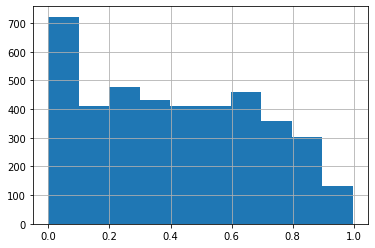

In [150]:
histo = df['Percentage Remaining']
d = histo.hist(bins = 10) 

In [154]:
mode(df['Percentage Remaining'])

0.0

In [163]:
df['Percentage Remaining'].value_counts(bins = 10,sort=True)

(-0.001996, 0.0996]    722
(0.199, 0.299]         478
(0.598, 0.697]         458
(0.299, 0.398]         432
(0.398, 0.498]         412
(0.0996, 0.199]        411
(0.498, 0.598]         410
(0.697, 0.797]         358
(0.797, 0.897]         303
(0.897, 0.996]         133
Name: Percentage Remaining, dtype: int64

In [182]:
df.to_csv('stats.csv')

In [166]:
protein_sequence = df['ProteinSeq'].unique()

In [167]:
len(protein_sequence)

800

In [168]:
def metCount(sequence, initial, end, counter, freq_range):
    portion = sequence[initial:end]
    count = 0
    for x in portion:
        if x == 'M':
            count += 1
    
    metCount.freq = count/counter
    freq_range.append(metCount.freq)

In [169]:
ten = []
twenty = []
thirty = []
forty = []
fifty = []
sixty = []
seventy = []
eighty = []
ninety = []
hundred = []

In [170]:
tracker = 0
for x in protein_sequence:
    count = -1 #excludes first met 
    for i in x:
        if i == 'M':
            count += 1
    if len(x)>0 and x != 'None' and count > 0:
        tracker += 1
        sub_seq = math.floor(len(x)/10)
        metCount(x, 1, sub_seq, count, ten)
        metCount(x, sub_seq+1, 2 * sub_seq, count, twenty)
        metCount(x, (2 * sub_seq)+1 , 3*sub_seq, count, thirty)
        metCount(x, (3*sub_seq)+1 , 4*sub_seq, count, forty)
        metCount(x, (4*sub_seq)+1 , 5*sub_seq, count, fifty)
        metCount(x, (5*sub_seq)+1 , 6*sub_seq, count, sixty)
        metCount(x, (6*sub_seq)+1 , 7*sub_seq, count, seventy)
        metCount(x, (7*sub_seq)+1 , 8*sub_seq, count, eighty)
        metCount(x, (8*sub_seq)+1 , 9*sub_seq, count, ninety)
        metCount(x, (9*sub_seq)+1 , len(x), count, hundred)
tracker

797

In [171]:
freq = []
labels = ['0.1', '0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0']
x_pos = np.arange(len(labels))

In [172]:
def statGrabber(sequence_range):
    freq.append(np.mean(sequence_range))

In [173]:
statGrabber(ten)
statGrabber(twenty)
statGrabber(thirty)
statGrabber(forty)
statGrabber(fifty)
statGrabber(sixty)
statGrabber(seventy)
statGrabber(eighty)
statGrabber(ninety)
statGrabber(hundred)

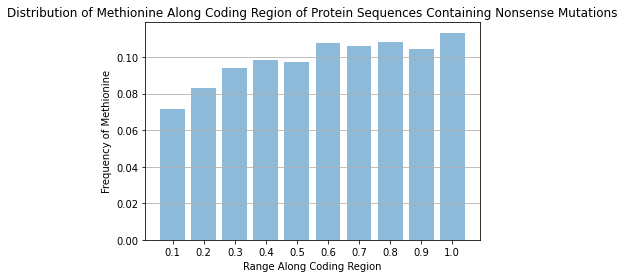

In [174]:
fig, ax = plt.subplots()
ax.bar(x_pos, freq, align = 'center', alpha = 0.5)
ax.set_ylabel('Frequency of Methionine')
ax.set_xlabel('Range Along Coding Region')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Distribution of Methionine Along Coding Region of Protein Sequences Containing Nonsense Mutations')
ax.yaxis.grid(True)

plt.savefig('MdistributionNonsense.png')
plt.show()

In [175]:
sum(freq)

0.9841495226818937

In [26]:
df2 = df2.dropna(subset = ['ProteinSeq'])

In [38]:
dist = []
for index, row in df2.iterrows():
    position = row[11]/len(row[15])
    if position <= 1:
        dist.append(position)

(array([ 945., 1027., 1040.,  982.,  970., 1031., 1002.,  969.,  986.,
         872.]),
 array([0.00104493, 0.10094044, 0.20083595, 0.30073145, 0.40062696,
        0.50052247, 0.60041797, 0.70031348, 0.80020899, 0.90010449,
        1.        ]),
 <a list of 10 Patch objects>)

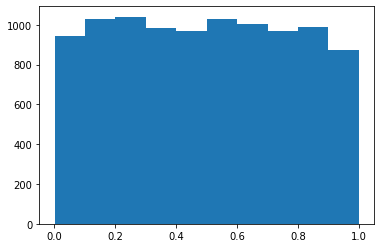

In [39]:
plt.hist(dist, 10)

In [40]:
#Gets a protein sequence in FASTA format given the ensembl transcript ID
def get_protein_sequence(canonical_transcript):
    server = "http://grch37.rest.ensembl.org"
    ext = "/sequence/id/" + canonical_transcript + "?content-type=text/x-fasta;type=protein"
    r = requests.get(server + ext, headers={"Content-Type": "text/x-fasta"})
    time.sleep(3)
    
    if not r.ok:
        try:
            r.raise_for_status()
            return "error"
        except requests.exceptions.HTTPError: #I should catch the error too or print, to find out which specific genes
            pass
    seqlist = r.text.split("\n", 1)
    if len(seqlist)==2:
        sequence = seqlist[1]
        sequence = sequence.replace("\n", "")
        return sequence
    
    #print("Sequence found")

#Adapted from https://github.com/xjenny2/phospho-programs/blob/master/ensembl.py

In [43]:
count = 0
for index, row in df2.iterrows():
    position = row[11]/len(row[15])
    if position > 1:
        for x,y in df2.iterrows():
            if y[0] == row[0]:
                nm = y[7].split('.')[0]
                z = get_protein_sequence(nm)
                df2.loc[x,'ProteinSeq'] = z

/Users/dylantom/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [48]:
df2.to_csv('test2.csv')